# Module 6 Peer Review Assignment

# Problem 1

Suppose $X$ and $Y$ are independent normal random variables with the same mean $\mu$ and the same variance $\sigma^2$. Do the random variables $W = X + Y$ and $U=2X$ have the same distribution? Explain.

E(W) = E(X+Y) = E(X) + E(Y) = 𝜇 + 𝜇 = 2𝜇 \
V(W) = V(X+Y) = V(X) + V(Y) = 𝜎2 + 𝜎2 = 2𝜎2 (X and Y are independent) \
𝑊∼𝑁(2𝜇,2𝜎2) 

E(U) = E(2X) = 2E(X) = 2𝜇 \
V(U) = V(2X) = 4V(X) = 4𝜎2 \
𝑊∼𝑁(2𝜇,4𝜎2) 

Both W and U do not have the same distribution

# Problem 2: Central Limit Theorem and Simulation

**a)** For this problem, we will be sampling from the Uniform distribution with bounds [0, 100]. Before we simulate anything, let's make sure we understand what values to expect. If $X \sim U(0, 100)$, what is $E[X]$ and $Var(X)$?

$$
E[X] = \frac{a+b}{2}=\frac{0+100}{2} = 50 \\
Var(X) = \frac{(b-a)^2}{12} = \frac{100^2}{12} \approx 833.33
$$

**b)** In real life, if we want to estimate the mean of a population, we have to draw a sample from that population and compute the sample mean. The important questions we have to ask are things like:

* Is the sample mean a good approximation of the population mean?
* How large does my sample need to be in order for the sample mean to well-approximate the population mean?

Complete the following function to sample $n$ rows from the $U(0, 100)$ distribution and return the sample mean. Start with a sample size of 10 and draw a sample mean from your function. Is the estimated mean a good approximation for the population mean we computed above? What if you increase the sample size?

In [1]:
uniform.sample.mean = function(n){
    
    # Your Code Here
    samples = runif(n, 0, 100)
    sample.mean = mean(samples)
    return(sample.mean)
    return(sample.mean)
}

uniform.sample.mean(10)

[1] 67.05691

In [2]:
uniform.sample.mean(100)

[1] 48.23023

In [3]:
uniform.sample.mean(1000)

[1] 49.89459

X ~ U(0,100)
$$ E[X] = \frac{a+b}{2}=\frac{0+100}{2} = 50 $$ 
theoretical expectation is 50. The higher of n, the closer sample mean gets to it.


**c)** Notice, for a sample size of $n$, our function is returning an estimator of the form

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i 
$$

That means, if each $X_i$ is a random variable, then our sample mean is also a random variable with its own distribution. We call this disribution the sample distribution. Let's take a look at what this distribution looks like.  

Using the `uniform.sample.mean` function, simulate $m=1000$ sample means, each from a sample of size $n=10$. Create a histogram of these sample means. Then increase the value of $n$ and plot the histogram of those sample means. What do you notice about the distribution of $\bar{X}$? What is the mean $\mu$ and variance $\sigma^2$ of the sample distribution?

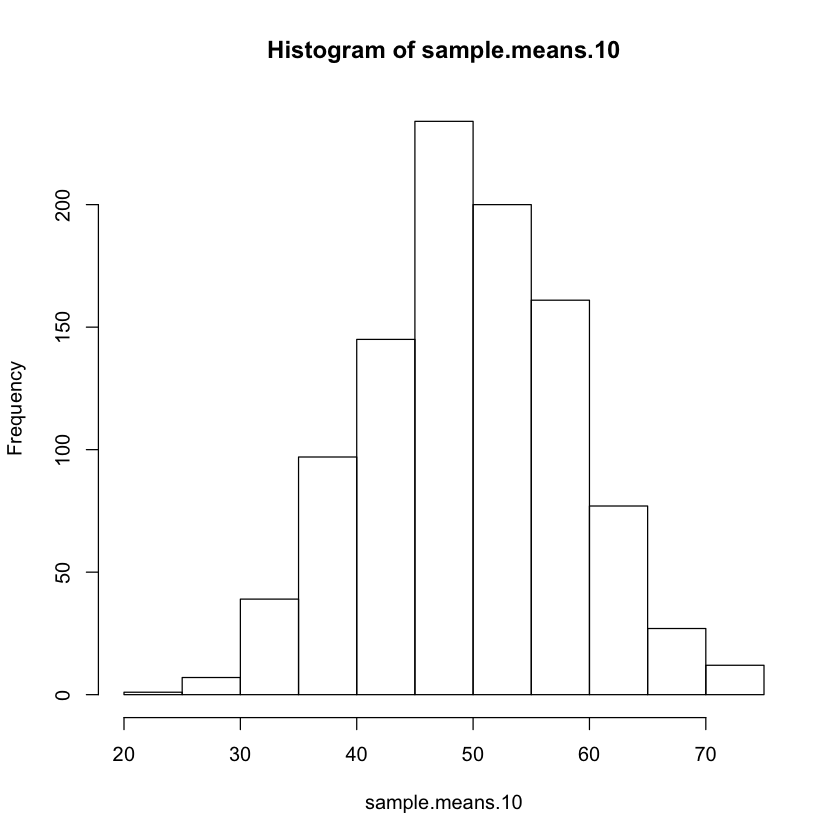

In [4]:
# Your Code Here
get.sample.means = function(m, n){
    means = numeric(m)
    for (i in 1:m){
        means[i] = uniform.sample.mean(n)
    }
    return(means)
}

m = 1000
sample.means.10 = get.sample.means(m, 10)
hist(sample.means.10)

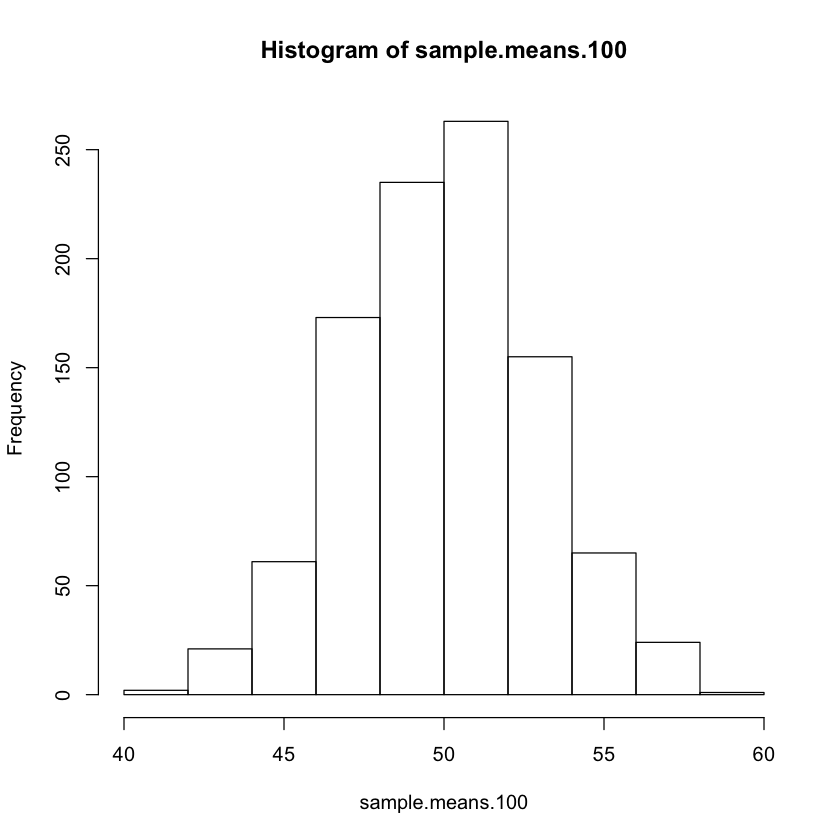

In [5]:
sample.means.100 = get.sample.means(m, 100)
hist(sample.means.100)

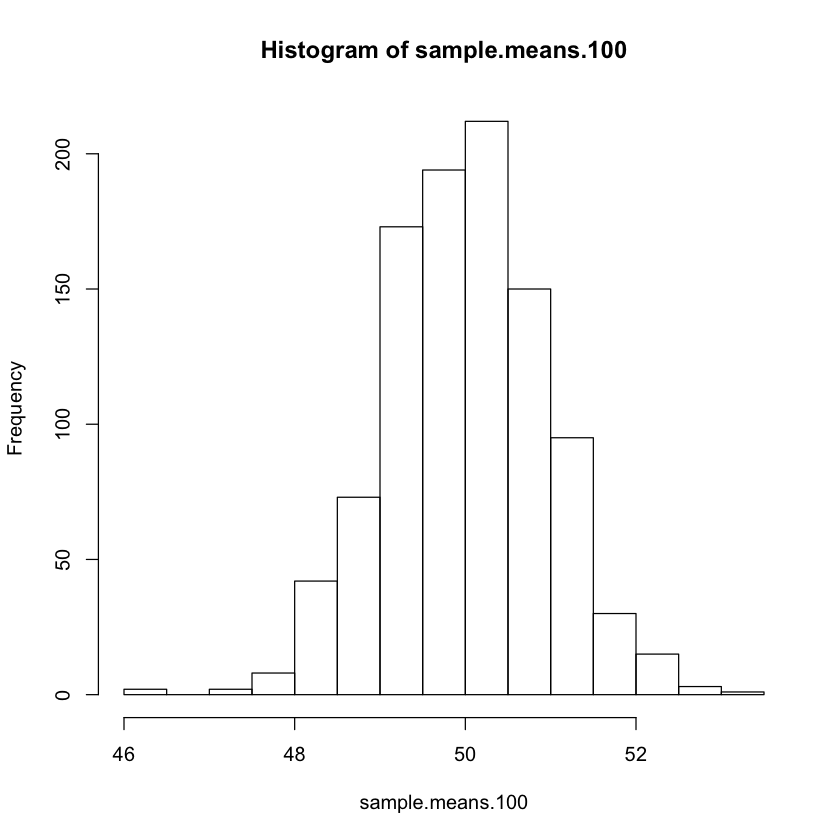

In [6]:
sample.means.100 = get.sample.means(m, 1000)
hist(sample.means.100)

We observe as below
* The distribution of $\bar{X}$ is normal.
* The distribution is always centered at about $50$, no matter how $n$ changes (𝜇 decides the the center location which never changed)
* As $n$ increases, the variance of $\bar{X}$ decreases and the histogram gets narrower. (𝜎2 affects spread) 

**d)** Recall that our underlying population distribution is $U(0, 100)$. Try changing the underlying distribution (For example a binomial(10, 0.5)) and check the sample distribution. Be sure to explain what you notice.

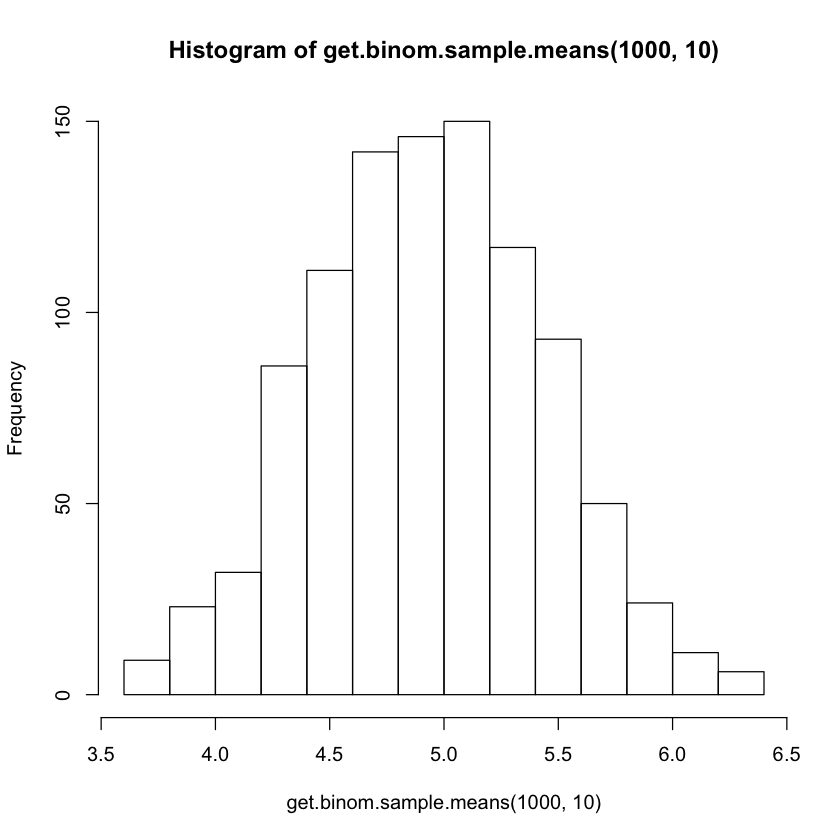

In [7]:
# Your Code Here
binomial.sample.mean = function(n){
    
    samples = rbinom(n, 10, 0.5)
    sample.mean = mean(samples)
    return(sample.mean)
}

get.binom.sample.means = function(m, n){
    means = numeric(m)
    for (i in 1:m){
        means[i] = binomial.sample.mean(n)
    }
    return(means)
}
hist(get.binom.sample.means(1000, 10))

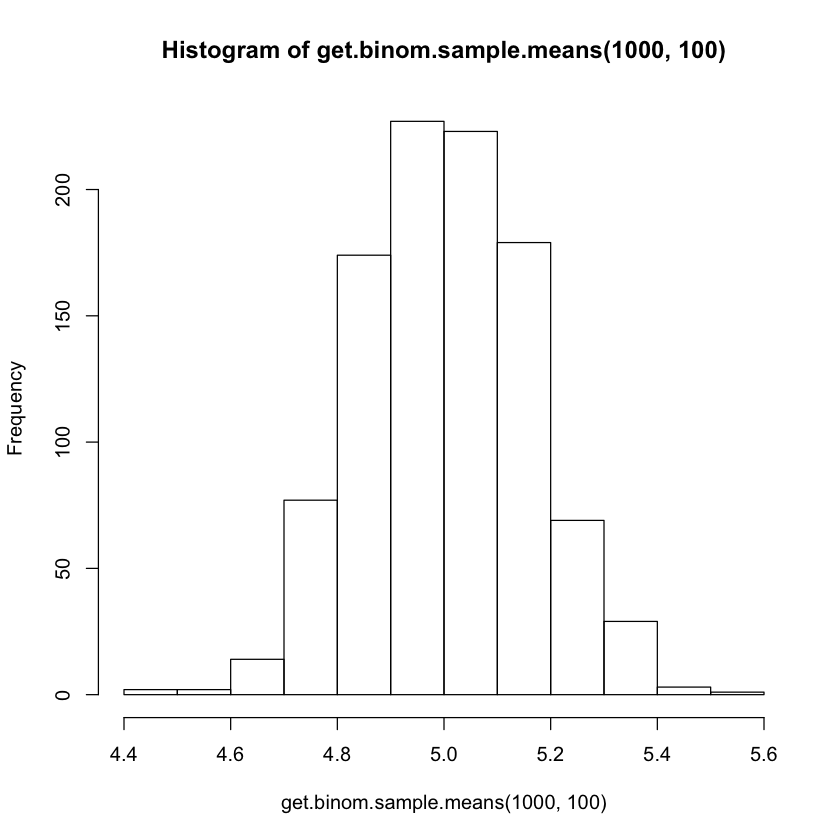

In [8]:
hist(get.binom.sample.means(1000, 100))

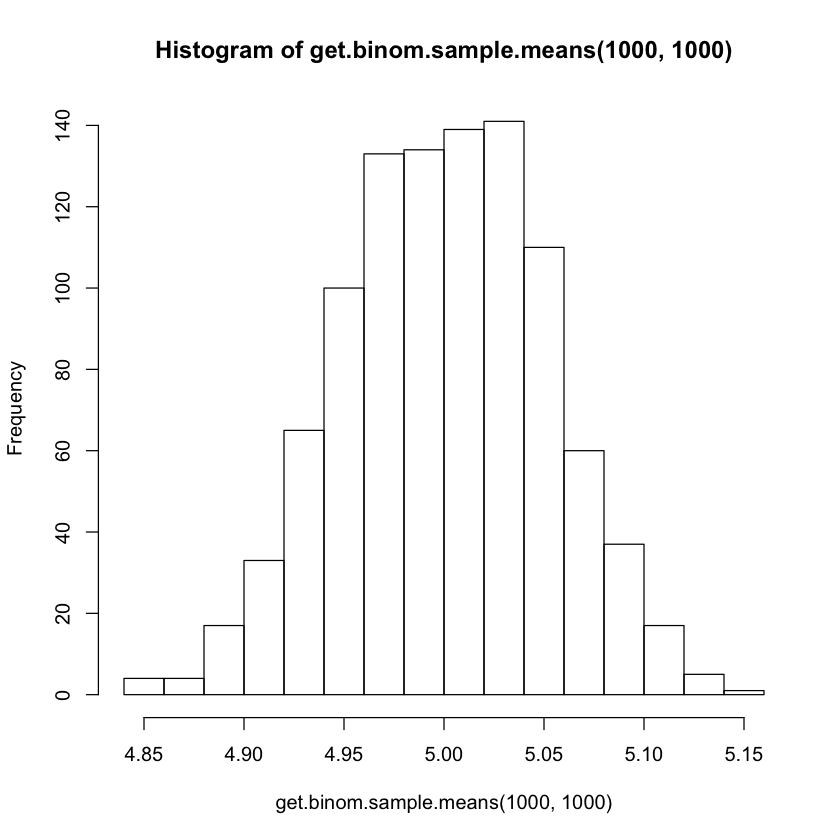

In [9]:
hist(get.binom.sample.means(1000, 1000))

Same observation as what we did for uniform:
* The distribution of $\bar{X}$ is normal.
* The distribution is always centered at about $0.5$, no matter how $n$ changes (𝜇 decides the the center location which never changed)
* As $n$ increases, the variance of $\bar{X}$ decreases and the histogram gets narrower. (𝜎2 affects spread) \
This conclues, as long as n is bigger enough, Centrel Limit Theorem can be used as approximation for any underlying distribution.

# Problem 3

Let $X$ be a random variable for the face value of a fair $d$-sided die after a single roll. $X$ follows a discrete uniform distribution of the form $\textrm{unif}\{1,d\}$. Below is the mean and variance of $\textrm{unif}\{1,d\}$.

$$ E[X] = \dfrac{1+d}{2} \qquad Var(X) = \dfrac{(d- 1 + 1)^2 - 1}{12}$$

**a)** Let $\bar{X}_n$ be the random variable for the mean of $n$ die rolls. Based on the Central Limit Theorem, what distribution does $\bar{X}_n$ follow when $d=6$.

Based on CLT,\
$$
\bar{X_n} \sim N(\frac{1+d}{2},\frac{(d-1+1)^2-1}{12}) = N(3.5,\frac{2.92}{n})
$$

$\bar{X_n}$ follows normal distribution.

**b)** Generate $n=1000$ die values, with $d=6$. Calculate the running average of your die rolls. In other words, create an array $r$ such that:

$$ r[j] = \sum_{i=1}^j \dfrac{X_i}{j} $$

Finally, plot your running average per the number of iterations. What do you notice?

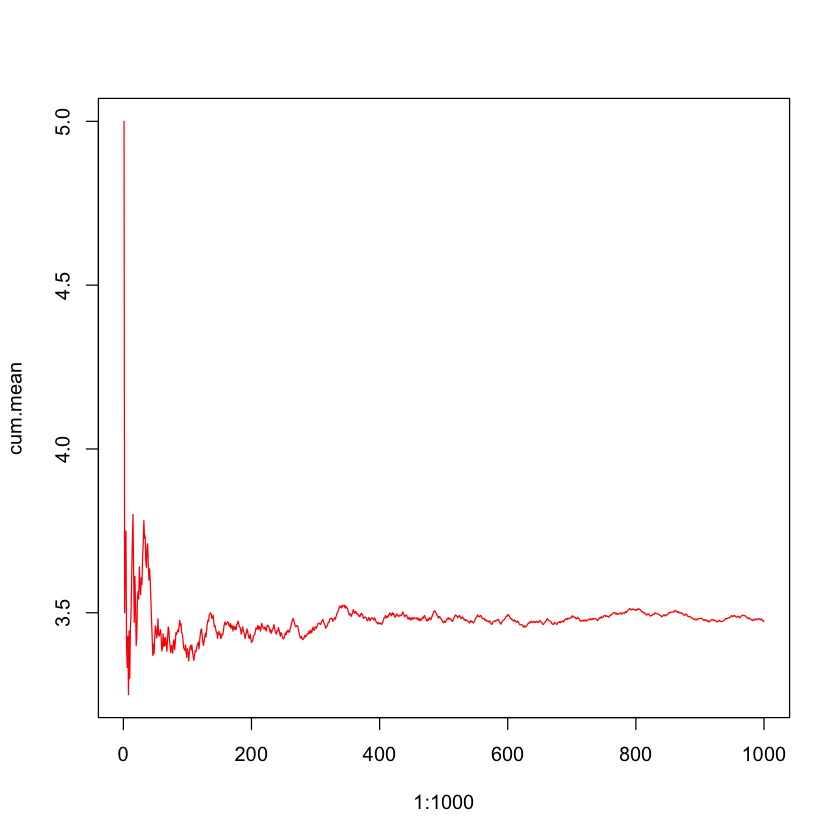

In [10]:
# Your Code Here
# Generate 1000 rolls from a fair d6
set.seed(3) 
d = 6
n = 1000
rolls = sample(1:d, size=n, replace=TRUE)
# Get cumulative sum
sum.of.rolls = cumsum(rolls)
# Calculate the cumulative average
cum.mean = sum.of.rolls / (1:1000)
# Plot the cumulative sum over iteration
plot(x=1:1000, y=cum.mean, type="l", col="red")

As the number of iterations increases, the calculated average gets closer and closer to the theoretical mean 3.5.